# import Module

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pycocotools.coco import COCO
from collections import Counter

# Json File Load

In [2]:
root = 'input/data'
json_path = "val.json"

In [3]:
json_file = None
with open(os.path.join(root, json_path), 'r') as f:
    json_file = json.load(f)

In [4]:
annotations = json_file["annotations"]
images = json_file["images"]
categories = json_file["categories"]

# Categories 종류

In [5]:
categories = pd.DataFrame(categories)
categories

,id,name,supercategory
0,1,General trash,General trash
1,2,Paper,Paper
2,3,Paper pack,Paper pack
3,4,Metal,Metal
4,5,Glass,Glass
5,6,Plastic,Plastic
6,7,Styrofoam,Styrofoam
7,8,Plastic bag,Plastic bag
8,9,Battery,Battery
9,10,Clothing,Clothing


# 클래스별 데이터 개수

In [6]:
categories = json_file["categories"]

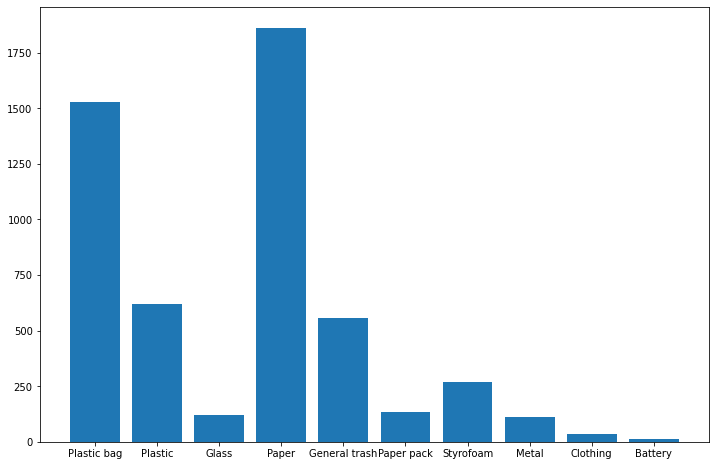

In [7]:
def id_to_name(c_id):
    # print(c_id)
    return categories[c_id-1]['name']

ids = [id_to_name(ann['category_id']) for ann in annotations]
counts = Counter(ids)

plt.figure(figsize=(12, 8))
plt.bar(counts.keys(), counts.values())
plt.show()

- Clothing, Battery 는 데이터가 적은 만큼 실험단계에서 학습도 거의 이루어지지 않음
- 부족한 데이터셋 Oversampling 방법 고안
- Augmentation을 적용해 해결
- 데이터가 많은것은 학습이 잘 이루어짐

# 이미지 한장에서 등장하는 객체 수

loading annotations into memory...
Done (t=1.06s)
creating index...
index created!


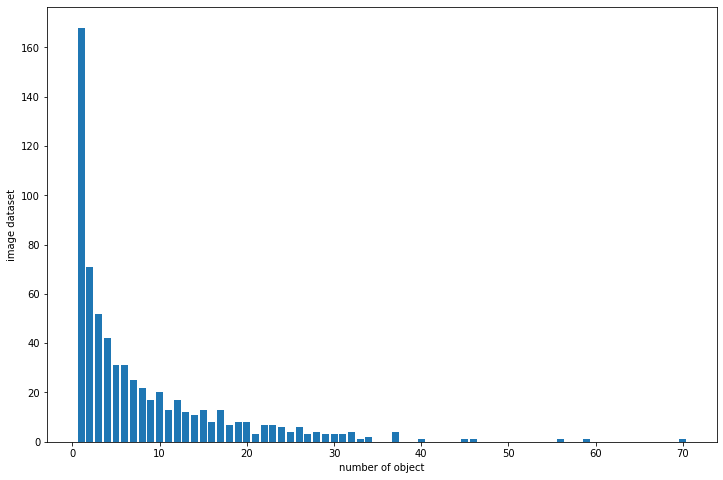

In [8]:
coco_form = COCO(os.path.join(root, json_path))

def id_to_objnum(ann):
    return len(coco_form.getAnnIds(imgIds = ann['id']))

obj_num = [id_to_objnum(ann) for ann in images]
counts = Counter(obj_num)

plt.figure(figsize=(12, 8))
plt.bar(counts.keys(), counts.values(), align='center')
plt.xlabel('number of object')
plt.ylabel('image dataset')
plt.show()